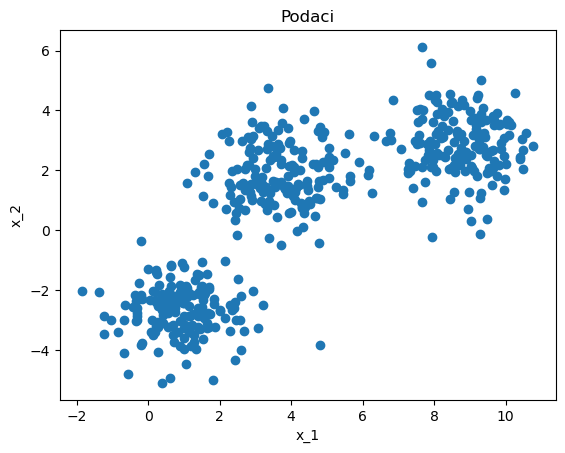

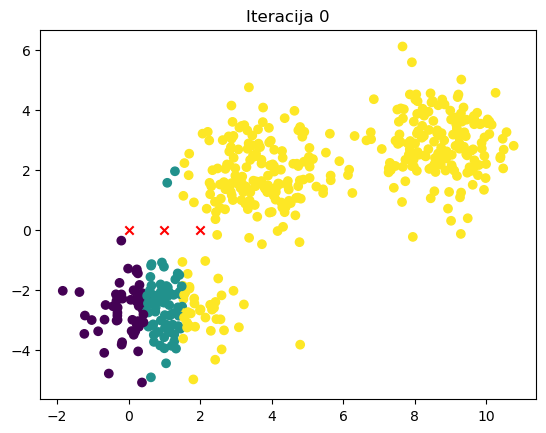

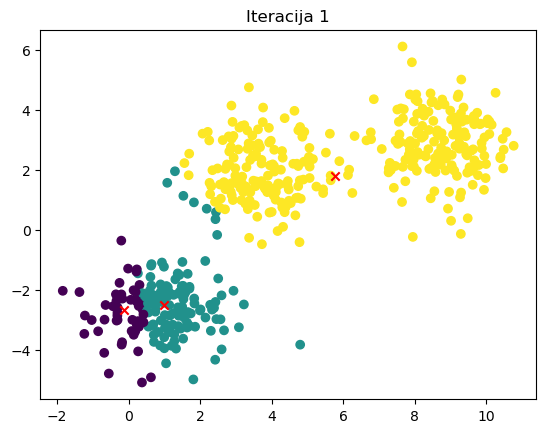

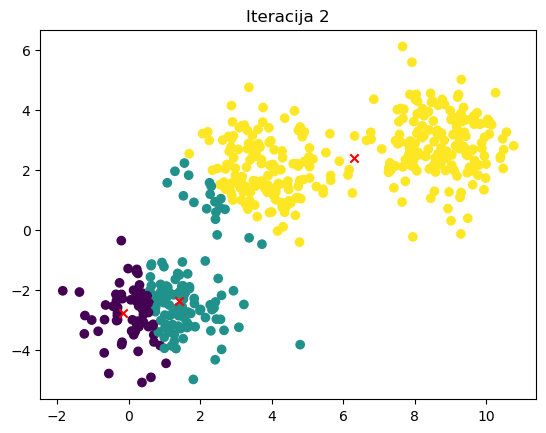

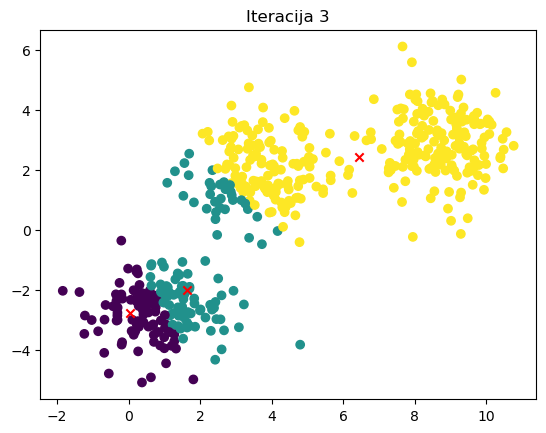

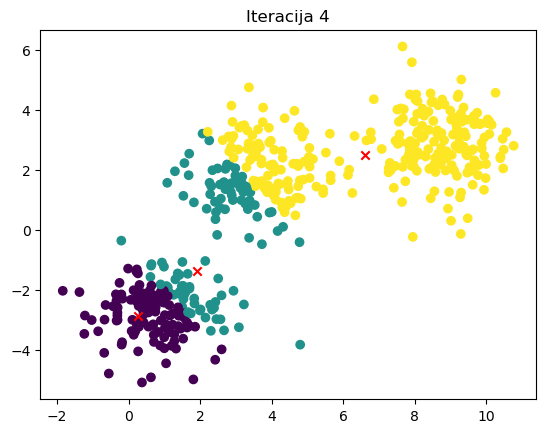

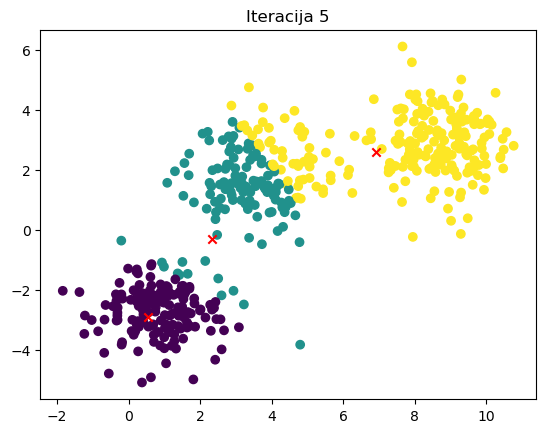

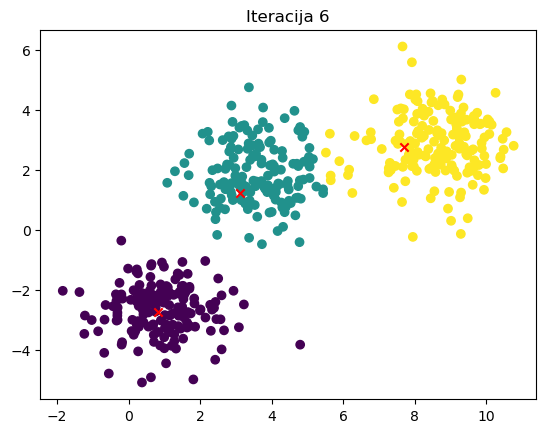

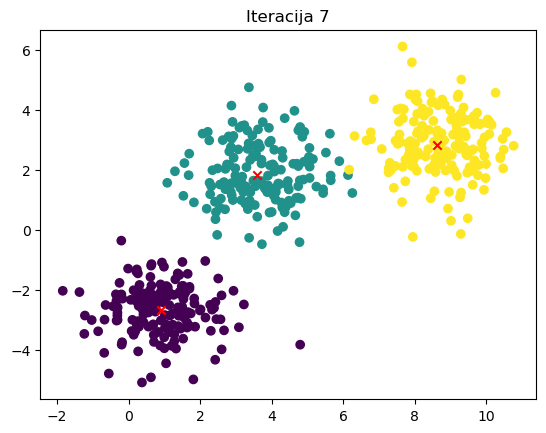

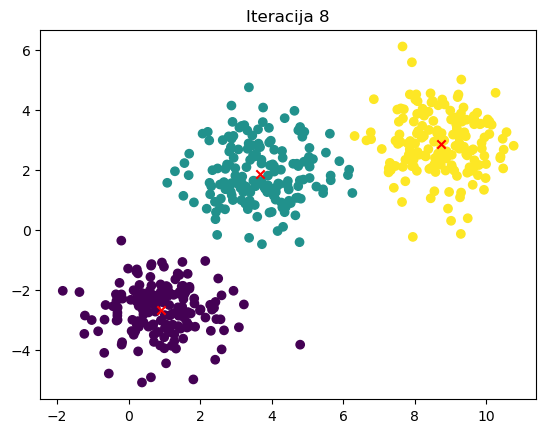

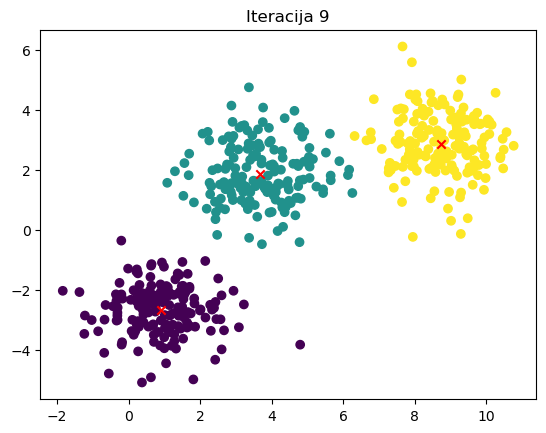

In [5]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets

def assignDataToCenter(X, c):
    
    n,m = np.shape(X)
    K, _ = np.shape(c)
    distance = -1*np.ones((n,K))

    for j in range(0,K):
        distance[:,j] = np.linalg.norm(X-c[j,:], axis = 1)

    b = np.argmin(distance, axis = 1)
    J = np.min(distance, axis = 1)
    J = J.sum()
    
    return b, J
    
def centroid(X,b,K):
    
    n,m = np.shape(X)    
    centers = np.zeros((K,m))

    for j in range(0,K):
        centers[j,:] = np.sum(X[b==j,:], axis = 0)
        centers[j,:] /= np.sum( 1.0*(b==j))
    
    return centers
    
def generate_data(n_samples, flagc):
    
    if flagc == 1:
        random_state = 365
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        
    elif flagc == 2:
        random_state = 148
        X,y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
        transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
        X = np.dot(X, transformation)
        
    elif flagc == 3:
        random_state = 148
        # X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5, 3.0], random_state=random_state)
        X, y = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state)

    elif flagc == 4:
        X, y = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
        
    elif flagc == 5:
        X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
    
    else:
        X = []
        
    return X


X = generate_data(500, 1)


plt.figure(1)
plt.title("Podaci")
plt.scatter(X[:,0], X[:,1])
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()


n, m = np.shape(X)
K = 3


np.random.seed(1)
centers = X[np.random.choice(X.shape[0], K, replace=False),:]
centers = np.array([[0,0], [1,0], [2,0]])

no_iter = 10
J = np.zeros((no_iter,1))


for i in range(0,no_iter):
    

    b, J[i,0] = assignDataToCenter(X,centers)
    

    plt.clf()
    plt.scatter(X[:,0], X[:,1], c=b)
    plt.scatter(centers[:,0],centers[:,1], color = 'red', marker = 'x')
    plt.title("Iteracija " +str(i))


    centers = centroid(X, b, K)

    plt.pause(0.1)


plt.show()



plt.show()

